In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [56]:
plt.style.use('fivethirtyeight')
cols=["forex_rate","cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
data=pd.read_table('Workbook3.csv',sep=',',names=cols,parse_dates=[0], index_col=0,header=0)
data.forex_rate=data.forex_rate.astype(float)
data.head()

,forex_rate,cpi,ppi,bank_rate,current_account,inflation_rate,gdp,per1,per2,per3
1973-01-04,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.02,8.02,8.02
1973-01-05,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.00,8.02,8.02
1973-01-06,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.00,8.02
1973-01-07,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.00
1973-01-08,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.01


In [57]:
cols2=["cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
y=data["forex_rate"]
x=data[cols2]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=0)

In [58]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

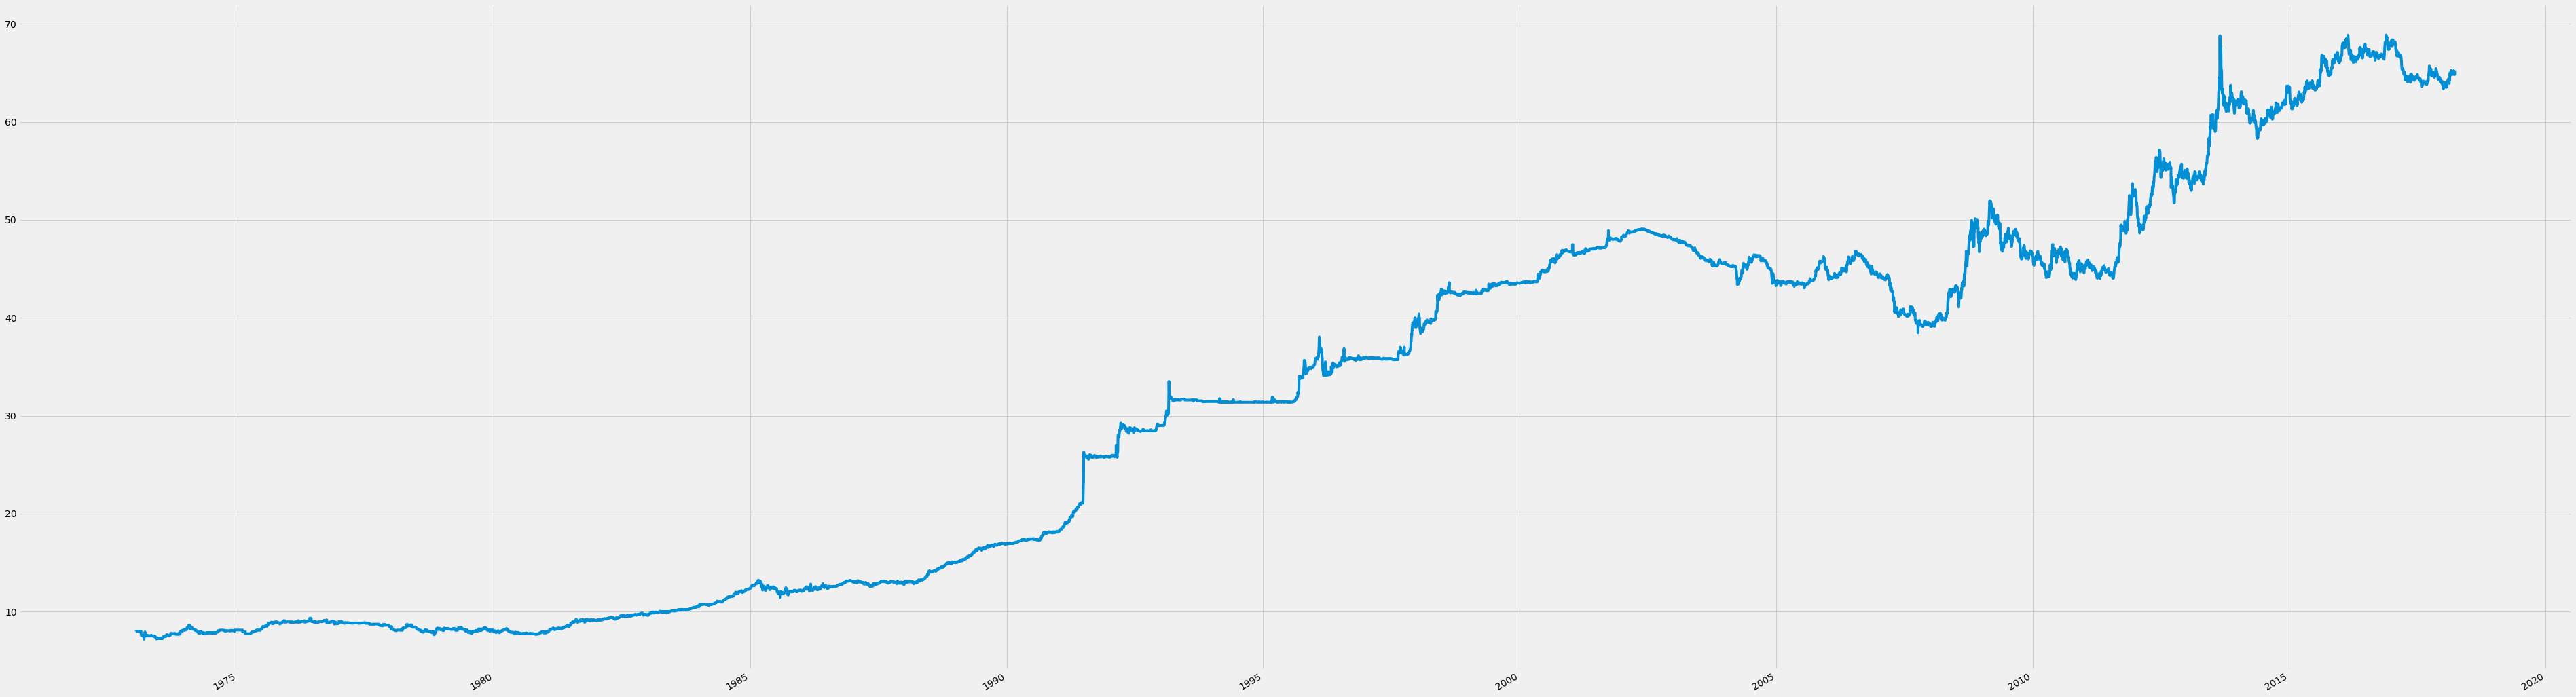

In [59]:
#checking stationarity
y=data["forex_rate"]
y.plot(figsize=(60,20))
plt.show()

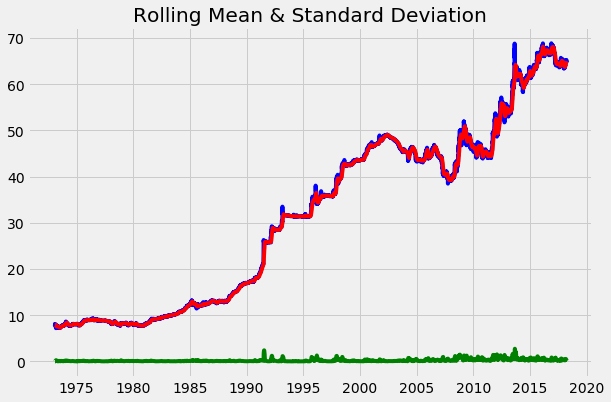

In [60]:
#checking stationarity
rolmean=y.rolling(30).mean()
rolstd=y.rolling(30).std()
plt.plot(y, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

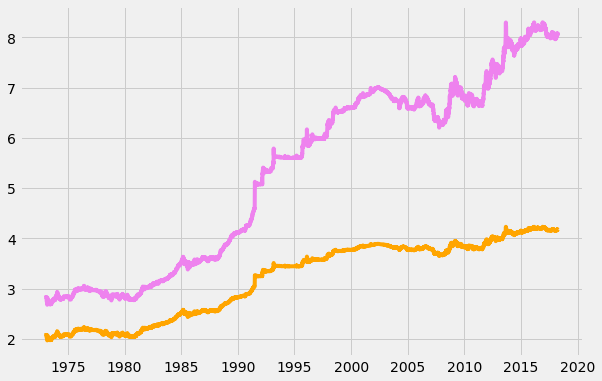

In [61]:
#transformation using sqrt and log
y_log = np.log(y)
y_log.dropna(inplace=True)
y_sqrt = np.sqrt(y)
plt.plot(y_log,color='orange')
plt.plot(y_sqrt,color='violet')
plt.show()

,forex_rate
1973-01-04,2.079442
1973-01-05,2.080691
1973-01-06,2.080691
1973-01-07,2.080691
1973-01-08,2.079442


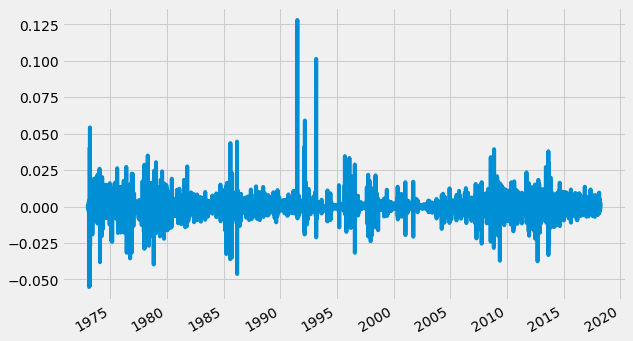

In [62]:

#differencing
y_log_diff = y_log - y_log.shift()
y_log_diff.plot()
y_log_diff.dropna(inplace=True)

y_log=pd.DataFrame(y_log)
y_log.head()

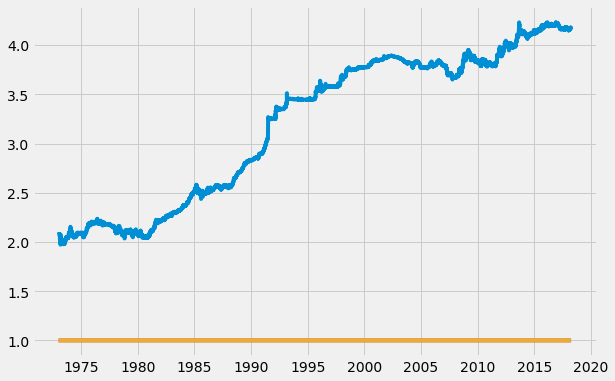

In [63]:
#decompsition
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(y_log,model='multiplicative',freq=1)
trend = dec.trend
seasonal = dec.seasonal
residual = dec.resid

plt.plot(trend, label='Trend')
plt.plot(seasonal,label='Seasonality')
plt.plot(residual, label='Residuals')

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y_log_diff, nlags=10)
lag_pacf = pacf(y_log_diff, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

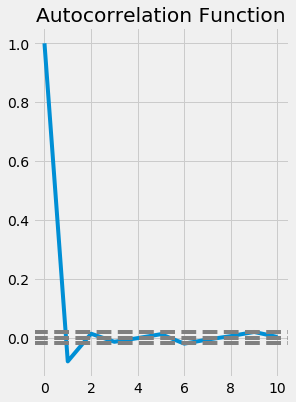

In [64]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

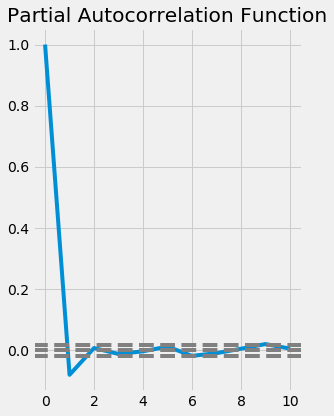

In [65]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [66]:
# p can be 0, 1 
#q can be 0, 1
# d can be 0, 1 or 2

In [67]:
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(y_log_diff,order=(1,1,1))
result=model.fit()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


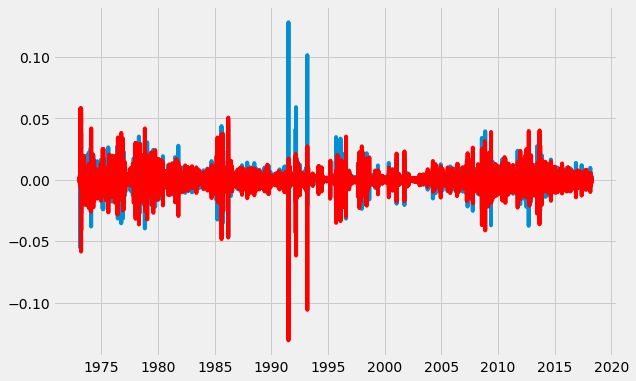

In [68]:
plt.plot(y_log_diff)
plt.plot(result.fittedvalues, color='red')

,0
count,11810.000000
mean,-0.000001
std,0.004828
min,-0.055227
25%,-0.001220
50%,-0.000036
75%,0.001084
max,0.123801


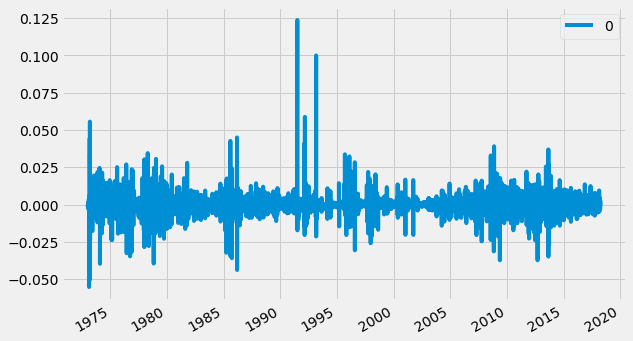

In [69]:
residual=pd.DataFrame(result.resid)
residual.plot()
residual.describe()